## 《合成孔径雷达成像——算法与实现》中5.6 点目标示例  零斜视角情况

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [2]:
from numpy import sin,cos,sinc,arctan,angle,pi,abs,ceil,sqrt,exp
# from numpy.fft import fft,fft2
from scipy.fft import fft,fft2
from numpy import savetxt

## 场景设置
# 雷达设置
C = 3e8;                                                                    # 光速
f0 = 5.3e9;                                                                 # 雷达工作频率
lambda0 = C/f0;                                                              # 工作波长
La = 3.3;
theta = 0;                                                                  # 波束斜视角
theta = theta/180*pi;
# 平台设置                           
V = 150;                                                                    # 雷达有效速度
Rc = 20e3;                                                                  # 景中心斜距
R0 = Rc*cos(theta);                                                         # 最短斜距
# 距离向设置
Tr = 25e-6;                                                                 # 发射脉冲时宽
Kr = 0.25e12;                                                               # 距离调频率
Kr_pos =  Kr;                                                               # 距离调频率
Kr_neg = -Kr;                                                               # 距离调频率
Br = Kr*Tr;
alphaR = 1.2;                                                               # 距离向过采样率
Fr = alphaR*Br;                                                             # 距离向采样频率
dtau = 1/Fr;                                                                # 距离向采样时间间隔
Nr = 256;                                                                   # 距离线数
# 方位向设置
Bdop = 0.886*2*V*cos(theta)/La;                                             # 多普勒带宽
alphaA = 1.3;                                                               # 方位向过采样率
Fa = alphaA*Bdop;                                                           # 方位向采样频率
deta = 1/Fa;                                                                # 方位向采样时间间隔
Na = 256;                                                                   # 方位线数
fc = 2*V*sin(theta)/lambda0;                                                 # 多普勒中心频率
thetaBW = 0.886*lambda0/La;                                                  # 方位向波束宽度

## 点目标设置
Ntarget = 1;
Ptarget = np.array([[R0,0]]);                                                           # 距离向坐标，方位向坐标

## 时间轴、频率轴设置
tau = (np.linspace(-Nr/2,Nr/2-1,Nr)*dtau+2*Rc/C).reshape((1,Nr));                                # 距离向时间轴
#tau = (np.linspace(-Nr/2,Nr/2-1,Nr)).reshape((1,Nr));                                # 距离向时间轴
eta = (np.linspace(-Na/2,Na/2-1,Na)*deta).reshape((1,Na));                                       # 方位向时间轴
tau_m = np.ones((Na,1))*tau;                                                     # 距离向时间轴矩阵
eta_m = eta.transpose()*np.ones((1,Nr));                                                    # 方位向时间轴矩阵
## 生成回波信号矩阵
S0_pos = np.zeros((Na,Nr));
S0_neg = np.zeros((Na,Nr));
for k in range(Ntarget):
    R = sqrt(Ptarget[k,0]**2+(V*eta_m-Ptarget[k,0]*np.tan(theta)-Ptarget[k,1])**2);         # 点目标斜距矩阵
#     print( R[99,99],R[100,100],R[101,101])
#     savetxt("R.txt",np.real(R),delimiter=',')
    Wr = np.where(abs(tau_m-2*R/C)<Tr/2,1,0);                                                         # 矩形窗矩阵
    Wa = sinc(0.886*arctan((V*eta_m-Ptarget[k,1])/Ptarget[k,0])/thetaBW)**2;              # 双程波束方向图 P91(4.27) (4.28)
#     savetxt("Wa.txt",np.real(Wa),delimiter=',')
    S0_pos = S0_pos+Wr*Wa*exp(-1j*4*pi*f0*R/C)*exp(1j*pi*Kr_pos*(tau_m-2*R/C)**2);   # 生成回波信号矩阵 P156 (6.1)
    S0_neg = S0_neg+Wr*Wa*exp(-1j*4*pi*f0*R/C)*exp(1j*pi*Kr_neg*(tau_m-2*R/C)**2);   # 生成回波信号矩阵 P156 (6.1)
savetxt("S0_pos.txt",S0_pos,delimiter=',')


(256, 256)
(256, 256)


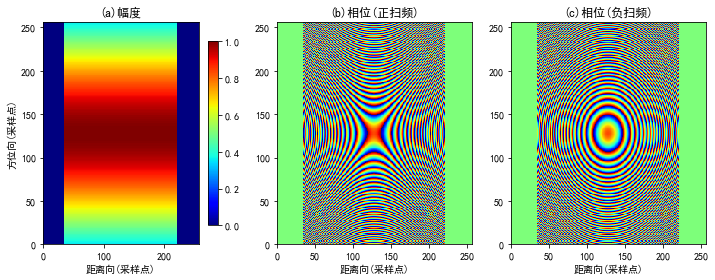

In [3]:
# 绘图
from matplotlib.pyplot import figure,subplot,plot,axis,title,xlabel,ylabel,text,arrow

# 绘图    
figure(figsize=(10,4));
subplot(131)
c = plt.pcolor(abs(S0_pos),cmap='jet')
plt.colorbar(shrink = .83)
xlabel('距离向(采样点)');ylabel('方位向(采样点)');title('(a)幅度');
subplot(132)
# plt.pcolor(angle(srt_z))
plt.pcolor(angle(S0_pos),cmap='jet')
xlabel('距离向(采样点)');title('(b)相位(正扫频)');
subplot(133)
# plt.pcolor(angle(srt_f))
plt.pcolor(angle(S0_neg),cmap='jet')
xlabel('距离向(采样点)');title('(c)相位(负扫频)');
plt.tight_layout()